In [1]:
import numpy as np
import pickle
import os

seed = 2023

In [2]:
import torch

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
from nlpsig_networks.scripts.swmhau_network_functions import (
    swmhau_network_hyperparameter_search,
)

In [4]:
output_dir = "client_talk_type_output"
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

## AnnoMI

In [5]:
%run ../load_anno_mi.py

In [6]:
anno_mi.head()

,mi_quality,transcript_id,topic,utterance_id,interlocutor,timestamp,utterance_text,annotator_id,therapist_input_exists,therapist_input_subtype,reflection_exists,reflection_subtype,question_exists,question_subtype,main_therapist_behaviour,client_talk_type,datetime,speaker
0,high,0,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,3,False,NaN,False,NaN,True,open,question,NaN,2023-09-28 00:00:13,-1
1,high,0,reducing alcohol consumption,1,client,00:00:24,Sure.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,2023-09-28 00:00:24,1
2,high,0,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",3,True,information,False,NaN,False,NaN,therapist_input,NaN,2023-09-28 00:00:25,-1
3,high,0,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral,2023-09-28 00:00:34,1
4,high,0,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,3,True,information,False,NaN,False,NaN,therapist_input,NaN,2023-09-28 00:00:34,-1


In [7]:
with open("../anno_mi_sbert.pkl", "rb") as f:
    sbert_embeddings = pickle.load(f)

sbert_embeddings.shape

(9699, 384)

<Axes: >

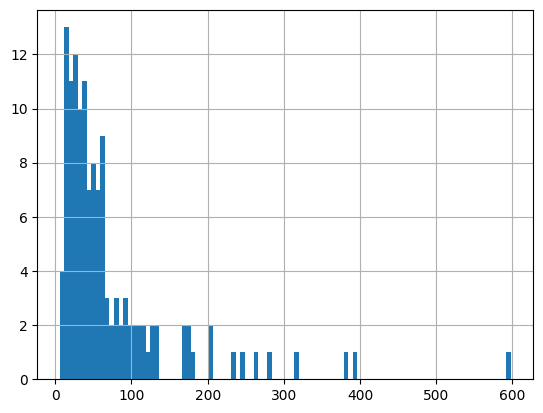

In [14]:
anno_mi["transcript_id"].value_counts().hist(bins=100)

133

In [20]:
sum(anno_mi["transcript_id"].value_counts() > 80) / len(
    anno_mi["transcript_id"].unique()
)

0.24812030075187969

In [36]:
sum(anno_mi[client_index]["utterance_id"] > 149) / len(anno_mi[client_index])

0.17977994602449657

In [30]:
sum(anno_mi["utterance_id"] > 80) / len(anno_mi)

0.33446747087328593

In [26]:
sum(anno_mi["utterance_id"] > 100)

2654

In [23]:
len(anno_mi)

9699